In [ ]:
################################HOW TO RUN THE CODE####################################################
Run cell nos.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
filepath = "wdbc.data"

In [3]:
new_column_names = ['ID', 'Diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [4]:
data = pd.read_csv( filepath , header = None , names = new_column_names)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

STEP 1: CHECK MISSING VALUES PATTERN BY HEATMAP.DELETE COLUMNS OR ROWS IF NEEDED

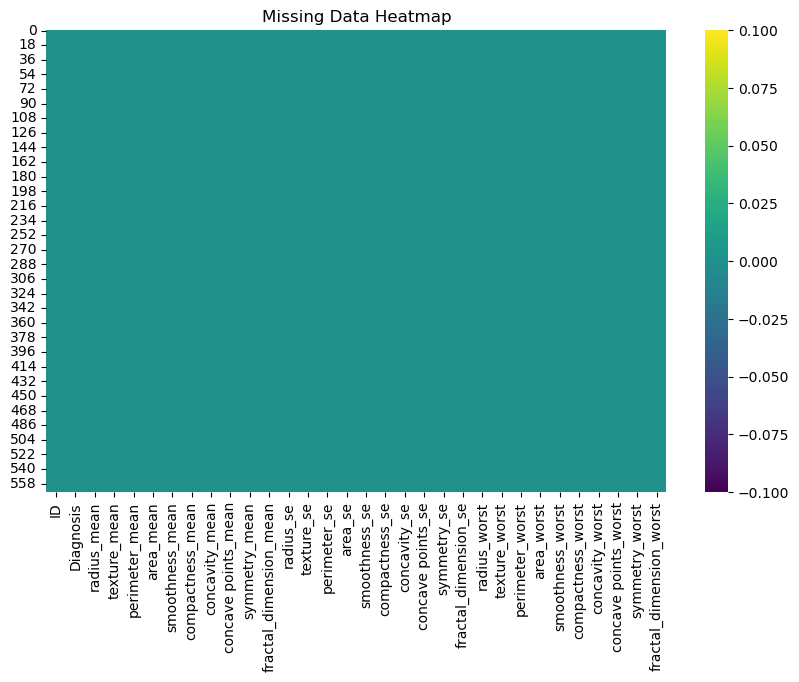

In [5]:
# Check for missing values
matrix_na = data.isna()

# Calculate the proportion of missing values for each column
pmiss = matrix_na.mean()

# Calculate the proportion of missing values for each row
nmiss = matrix_na.mean(axis=1)


# Create a missing data heatmap
plt.figure(figsize=(10, 6))  
sns.heatmap(matrix_na, cbar=True, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In our case there are no missing values in any of the columns; but if there were, we would execute the following code 

In [6]:
# Only keep columns with a proportion of missing values < 20%
dat1 = data.loc[:, data.isna().mean() < 0.2]

# Omit rows with missing values anywhere
dat2 = dat1.dropna()

# Get the dimensions of 'dat2'
num_rows, num_cols = dat2.shape
print(f"Number of Rows: {num_rows}, Number of Columns: {num_cols}")

Number of Rows: 569, Number of Columns: 32


STEP 2: CHECK THE DISTRIBUTION OF CONTINUOUS VARIABLES BY HISTOGRAM AND/OR BOXPLOT. DELETE OUTLIERS IF THERE ARE POINTS VERY ISOLATED FROM THE OTHERS.

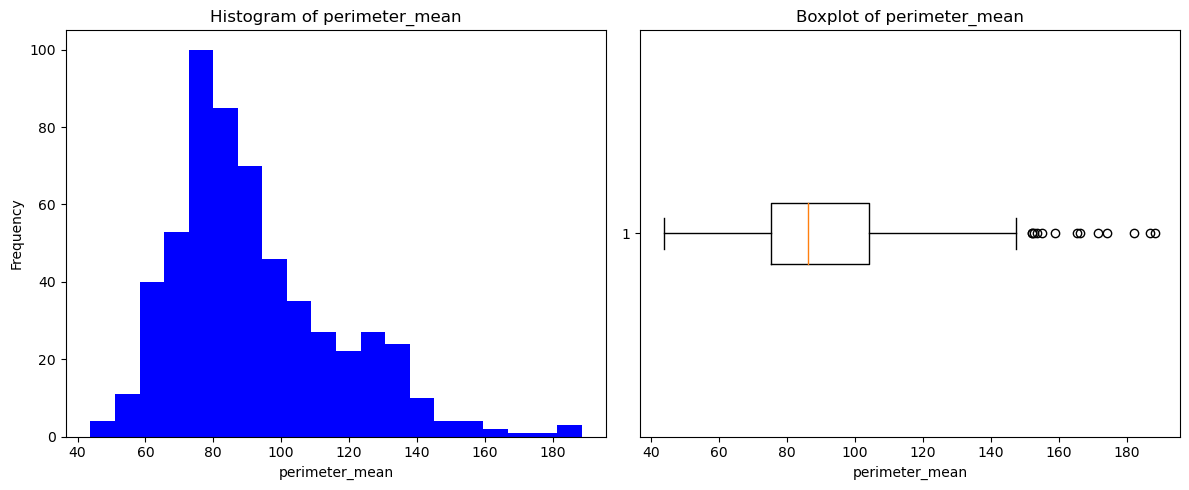

In [7]:
# This is how to do for single variable at a time
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a 1x2 grid of subplots

# Plot a histogram on the first subplot
axes[0].hist(dat2['perimeter_mean'], bins=20, color='blue')
axes[0].set_title('Histogram of perimeter_mean')
axes[0].set_xlabel('perimeter_mean')
axes[0].set_ylabel('Frequency')

# Plot a boxplot on the second subplot
axes[1].boxplot(dat2['perimeter_mean'], vert=False)
axes[1].set_title('Boxplot of perimeter_mean')
axes[1].set_xlabel('perimeter_mean')

plt.tight_layout()  # Adjust subplot spacing for better appearance
plt.show()

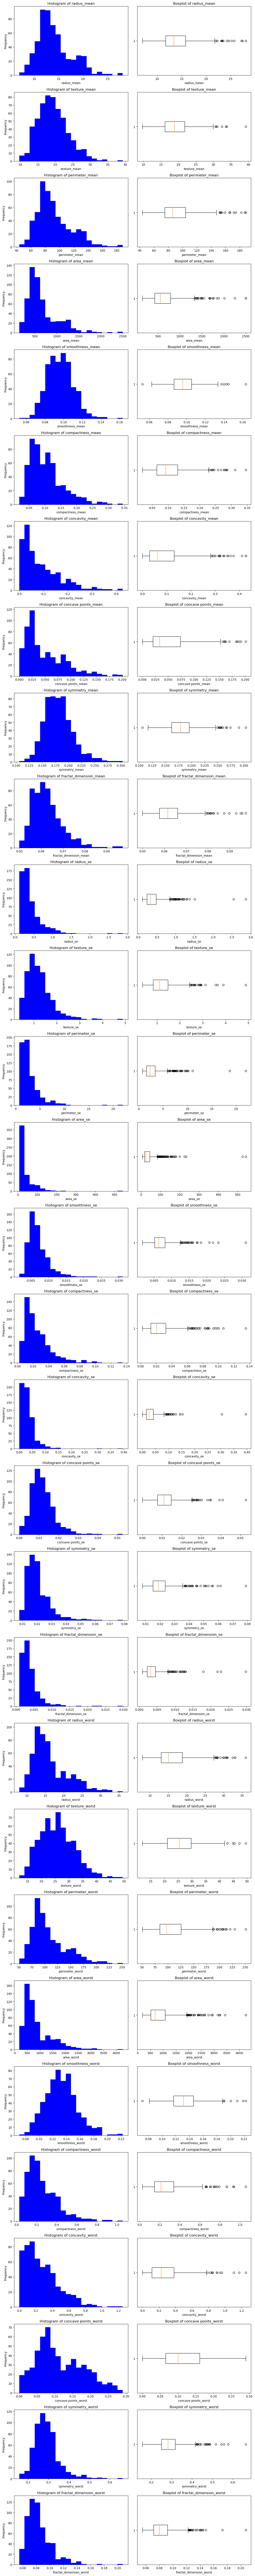

In [8]:
# This is a function to get the histograms and boxplots for each variable through a for loop

def plot_histogram_and_boxplot(data, variables, rows, cols):
    num_variables = len(variables)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))

    for i, variable in enumerate(variables):
        row = i
        col = 0

        # Plot a histogram on the first subplot
        axes[row, col].hist(data[variable], bins=20, color='blue')
        axes[row, col].set_title(f'Histogram of {variable}')
        axes[row, col].set_xlabel(variable)
        axes[row, col].set_ylabel('Frequency')

        # Plot a boxplot on the second subplot
        axes[row, col + 1].boxplot(data[variable], vert=False)
        axes[row, col + 1].set_title(f'Boxplot of {variable}')
        axes[row, col + 1].set_xlabel(variable)
        
        

    plt.tight_layout()
    plt.show()


variables_to_plot = [ 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst'] 

plot_histogram_and_boxplot(dat2, variables_to_plot, rows=30, cols=2)  

STEP 3: CHECK THE FREQUENCY TABLE FOR CATEGORICAL VARIABLES. COMBINE CATEGORIES IF THERE ARE TOO FEW OBSERVATIONS IN SOME CATEGORIES.

In [9]:
frequency_table = dat2['Diagnosis'].value_counts()

print(frequency_table)

B    357
M    212
Name: Diagnosis, dtype: int64


Step 4. Create dummy variables for categorical variables. - No categorical independent variables in our data so no need to create dummy variables.

Step 5: GENERATE PAIRWISE CORRELATION TABLE. DO COLLINEARITY CHECK. IF THERE ARE 2 INDEPENDENT VARIABLES WITH CORRELATION >0.8 OR <0.8, DELETE ONE OF THEM.

<Figure size 2000x1500 with 0 Axes>

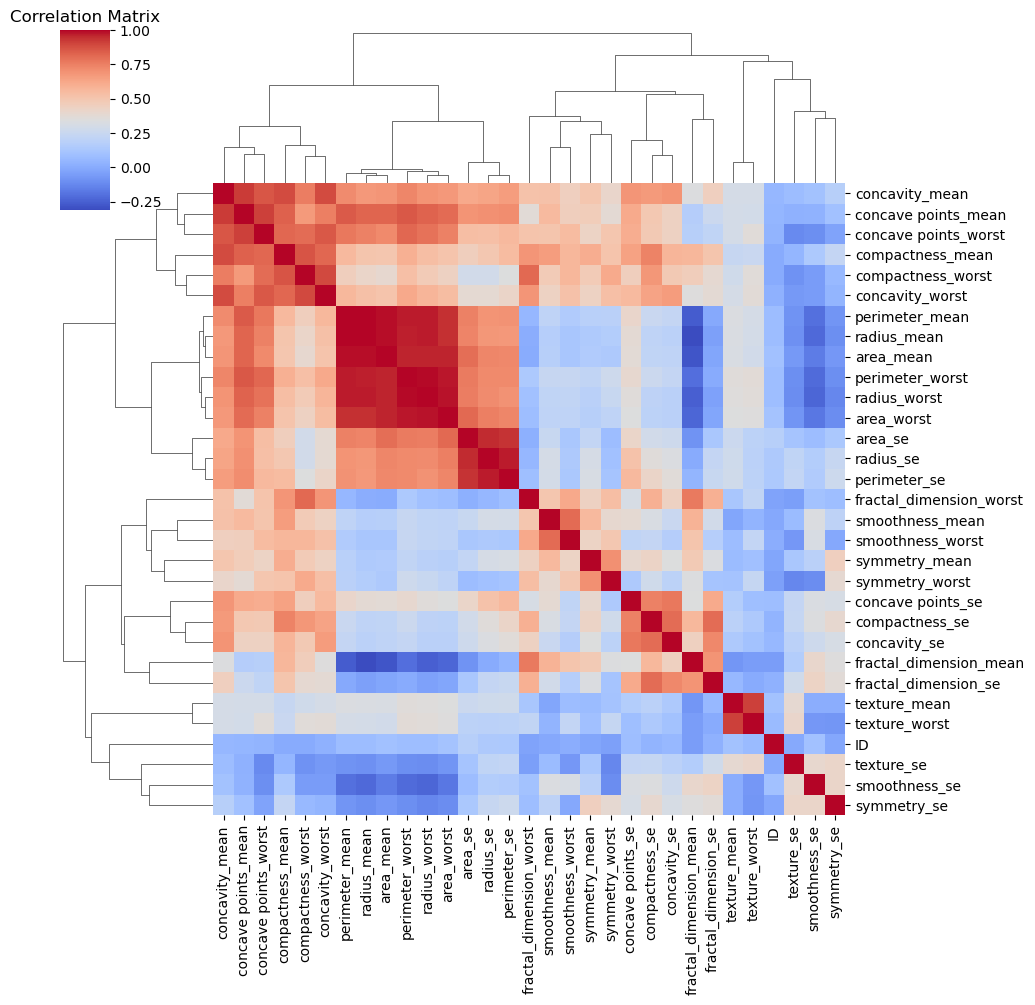

In [10]:
###################CORRELATION MATRIX######################
#Remove the target variable before calculating the correlation matrix.
new_df = dat2.drop(columns=['Diagnosis'])

# Calculate the correlation matrix
correlation_matrix = new_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 15))  # Set the figure size
#sns.cluster(correlation_matrix, annot=True, cmap='coolwarm', vmin = -0.8, vmax = +0.8, fmt=".2f")
sns.clustermap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", method = 'average')
# Customize the heatmap (optional)
plt.title("Correlation Matrix")
plt.xticks(rotation=90)
plt.show()


<Figure size 3000x2000 with 0 Axes>

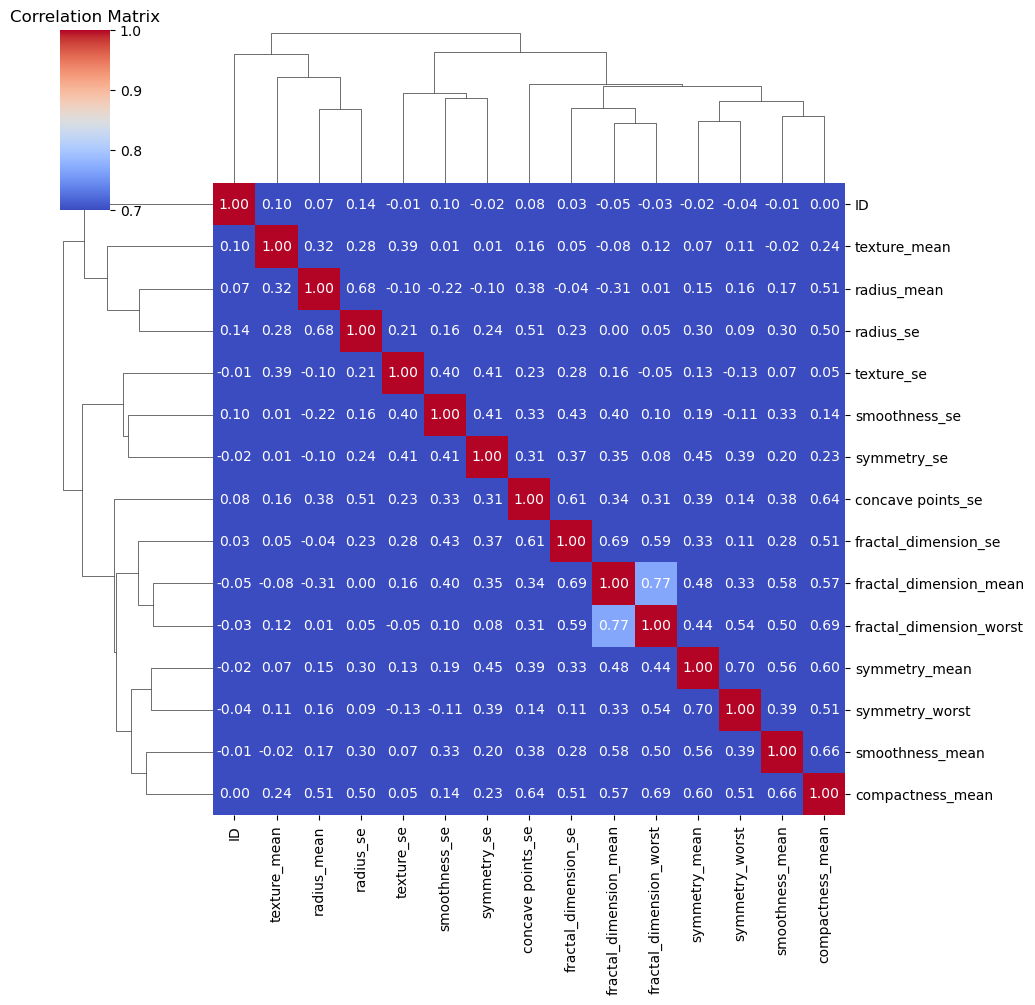

In [11]:
#########################################CLUSTER MAP##################################################
#Remove the target variable before calculating the correlation matrix.
new_df_1 = new_df.copy()
new_df_1 = new_df_1[['ID',
 'radius_mean',
 'texture_mean',
 'smoothness_mean',
 'compactness_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'smoothness_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'symmetry_worst',
 'fractal_dimension_worst']]

# Calculate the correlation matrix
correlation_matrix = new_df_1.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(30, 20))  # Set the figure size
#sns.cluster(correlation_matrix, annot=True, cmap='coolwarm', vmin = -0.8, vmax = +0.8, fmt=".2f")
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm',vmin = 0.7, vmax=1.0, fmt=".2f", method = 'average')
# Customize the heatmap (optional)
plt.title("Correlation Matrix")
plt.xticks(rotation=90)
plt.show()

In [12]:
data_preped = data[['ID',
 'radius_mean',
 'texture_mean',
 'smoothness_mean',
 'compactness_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'smoothness_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'symmetry_worst',
 'fractal_dimension_worst','Diagnosis']]

In [13]:
df_variables = data[[
 'radius_mean',
 'texture_mean',
 'smoothness_mean',
 'compactness_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'smoothness_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'symmetry_worst',
 'fractal_dimension_worst']].copy()

df_aux = data[['Diagnosis']].copy()

In [14]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(df_variables)

#convert to df
df_variables = pd.DataFrame(scaled_data, columns=df_variables.columns)

#concat
data_preped_scaled = pd.concat([df_variables, df_aux], axis=1)

# Print the scaled data
data_preped_scaled

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst,Diagnosis
0,0.521037,0.022658,0.593753,0.792037,0.686364,0.605518,0.356147,0.120469,0.159296,0.300625,0.311645,0.183042,0.598462,0.418864,M
1,0.643144,0.272574,0.289880,0.181768,0.379798,0.141323,0.156437,0.082589,0.119387,0.253836,0.084539,0.091110,0.233590,0.222878,M
2,0.601496,0.390260,0.514309,0.431017,0.509596,0.211247,0.229622,0.094303,0.150831,0.389847,0.205690,0.127006,0.403706,0.213433,M
3,0.210090,0.360839,0.811321,0.811361,0.776263,1.000000,0.139091,0.175875,0.251453,0.353665,0.728148,0.287205,1.000000,0.773711,M
4,0.629893,0.156578,0.430351,0.347893,0.378283,0.186816,0.233822,0.093065,0.332359,0.357075,0.136179,0.145800,0.157500,0.142595,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.526948,0.296055,0.336364,0.132056,0.385479,0.197976,0.291906,0.464861,0.045843,0.115536,0.097575,0.105667,M
565,0.622320,0.626987,0.407782,0.257714,0.349495,0.113100,0.236828,0.464728,0.137879,0.317863,0.156160,0.055387,0.198502,0.074315,M
566,0.455251,0.621238,0.288165,0.254340,0.267677,0.137321,0.124896,0.157974,0.142435,0.294942,0.074548,0.103547,0.128721,0.151909,M
567,0.644564,0.663510,0.588336,0.790197,0.675253,0.425442,0.222524,0.272896,0.163477,0.315211,0.216103,0.182766,0.497142,0.452315,M


In [18]:
data_preped_scaled['Diagnosis'] = data_preped_scaled['Diagnosis'].replace({'B': 0, 'M': 1})

In [19]:
data_preped_scaled.to_csv('wdbc_preped_scaled.csv')